<a href="https://colab.research.google.com/github/CalciferXe/Seminario_Inv/blob/main/Yolov5FINAL_SEMINARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Nov 25 01:30:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (11714/11714), done.


In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=362c7c53-36a8-cb8b-602f-66fb75ac80a9, L2_cache_size=4MB)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3oF8RcZJHCDPlZFvpUDM")
project = rf.workspace("universidad-e9w4f").project("fish_detection-qikds")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fish_detection-1 in yolov5pytorch:: 100%|██████████| 4542/4542 [00:01<00:00, 4354.54it/s]


In [ ]:
%cat /content/fish_detection-1/data.yaml


names:
- 0 hembra
- 1 vientre_hembra
- 2 cabeza_hembra
- 3 macho
- 4 vientre_macho
- 5 cabeza_macho
nc: 6
roboflow:
  license: CC BY 4.0
  project: fish_detection-qikds
  url: https://universe.roboflow.com/universidad-e9w4f/fish_detection-qikds/dataset/1
  version: 1
  workspace: universidad-e9w4f
train: /content/fish_detection-1/train/images
val: /content/fish_detection-1/valid/images
test: /content/fish_detection-1/test/images


In [ ]:

%%time
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 50 \
  --data /content/fish_detection-1/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results \
  --cache


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02141    0.01852   0.006012         44        640:  76% 204/267 [00:46<00:11,  5.43it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02144     0.0185   0.006035         34        640:  77% 205/267 [00:47<00:12,  4.94it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02144    0.01849   0.006054         42        640:  77% 206/267 [00:47<00:12,  5.00it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cu

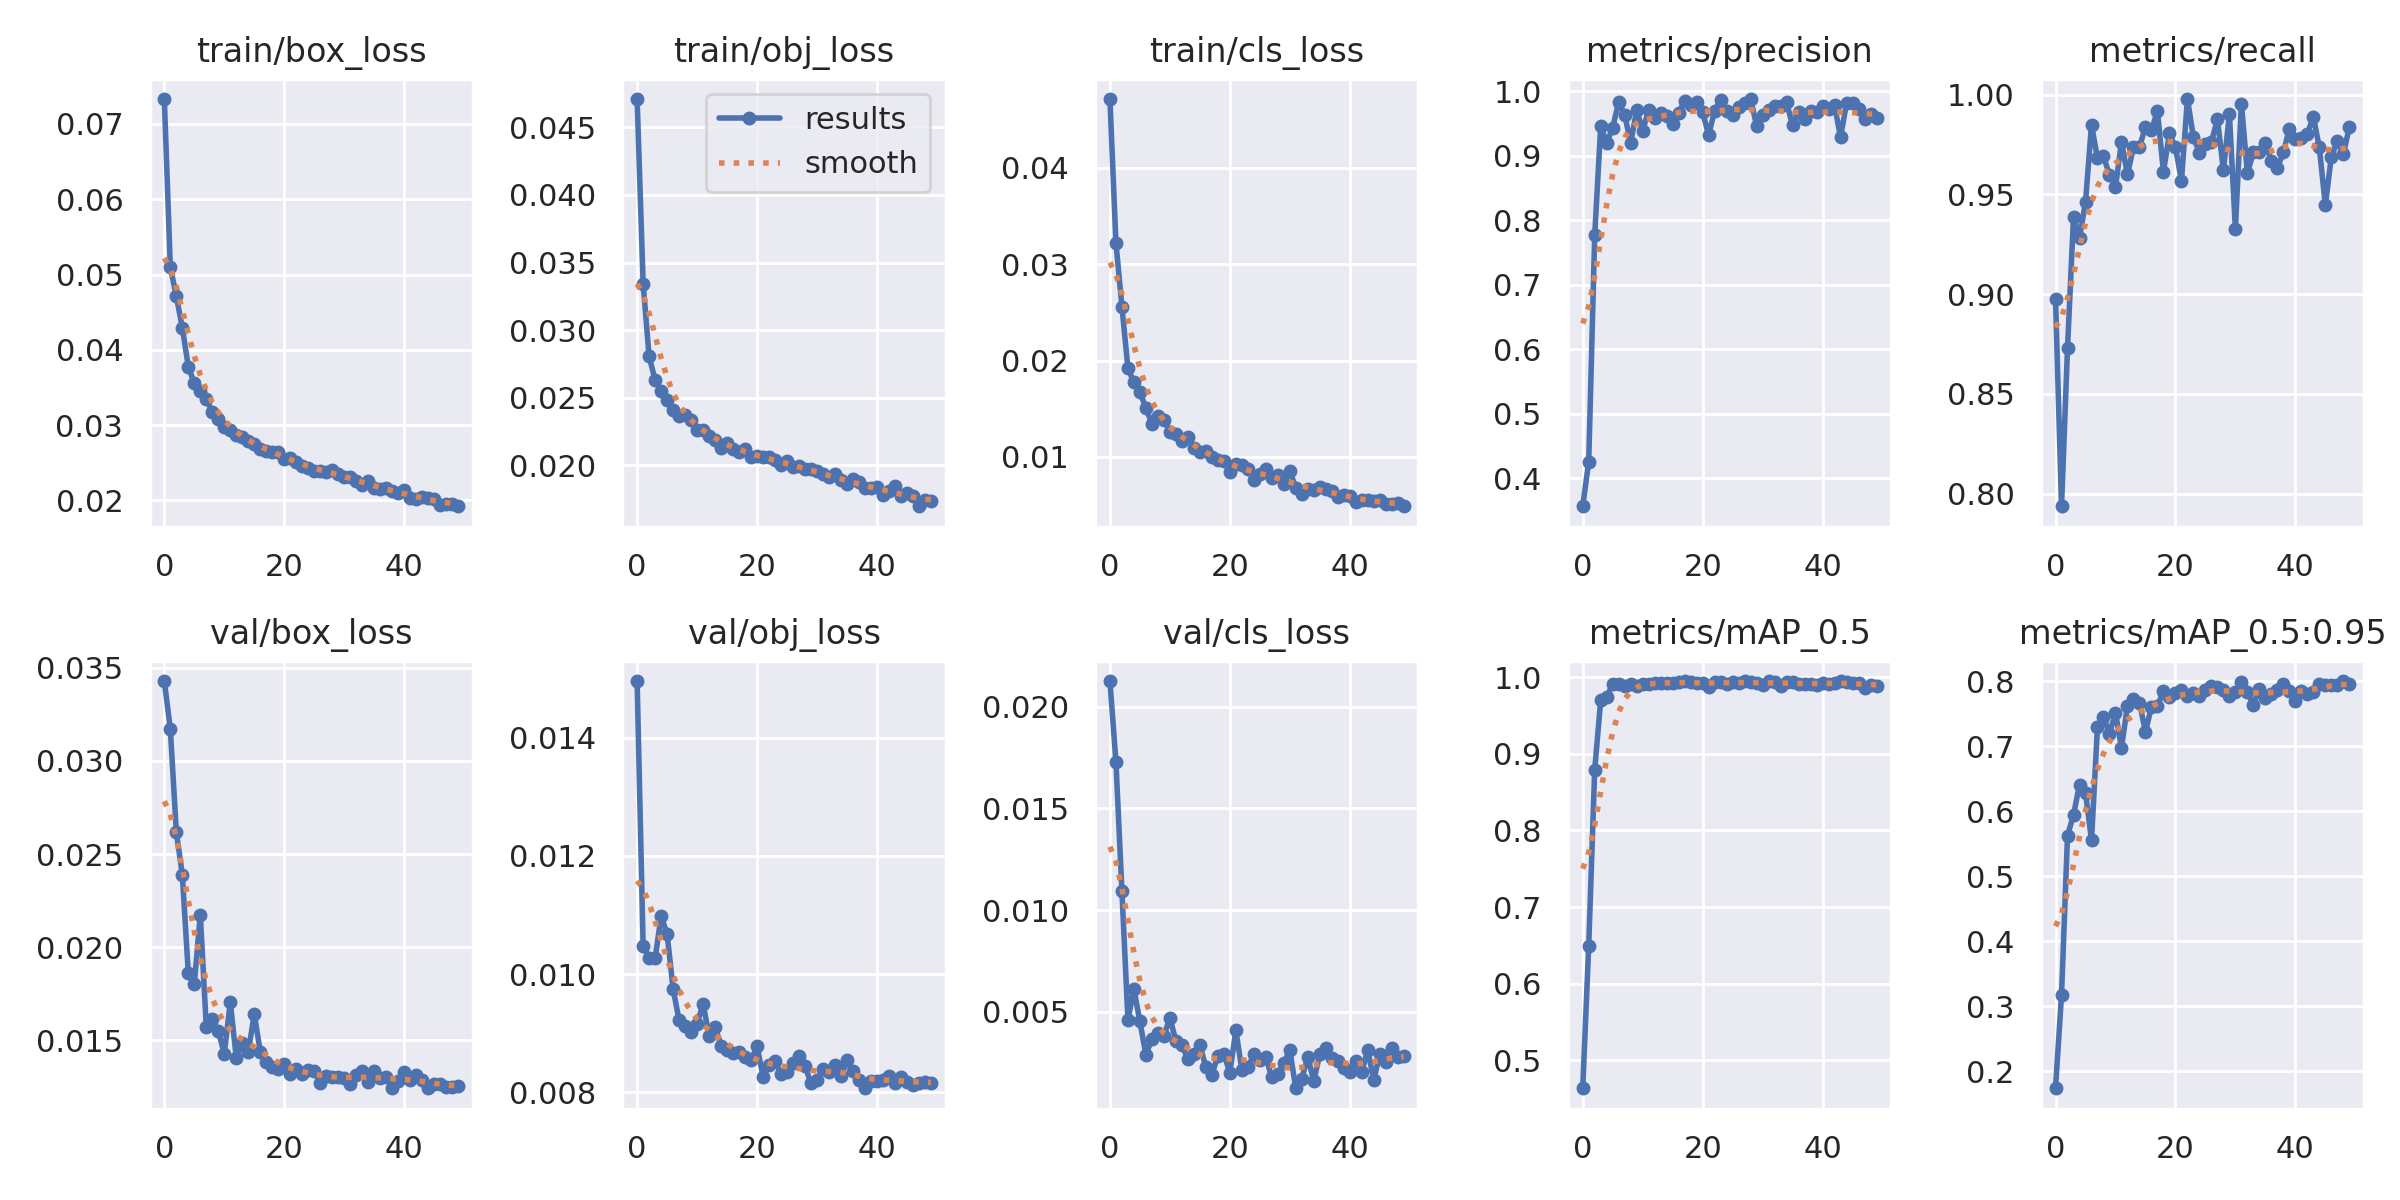

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results4/results.png', width=1000)

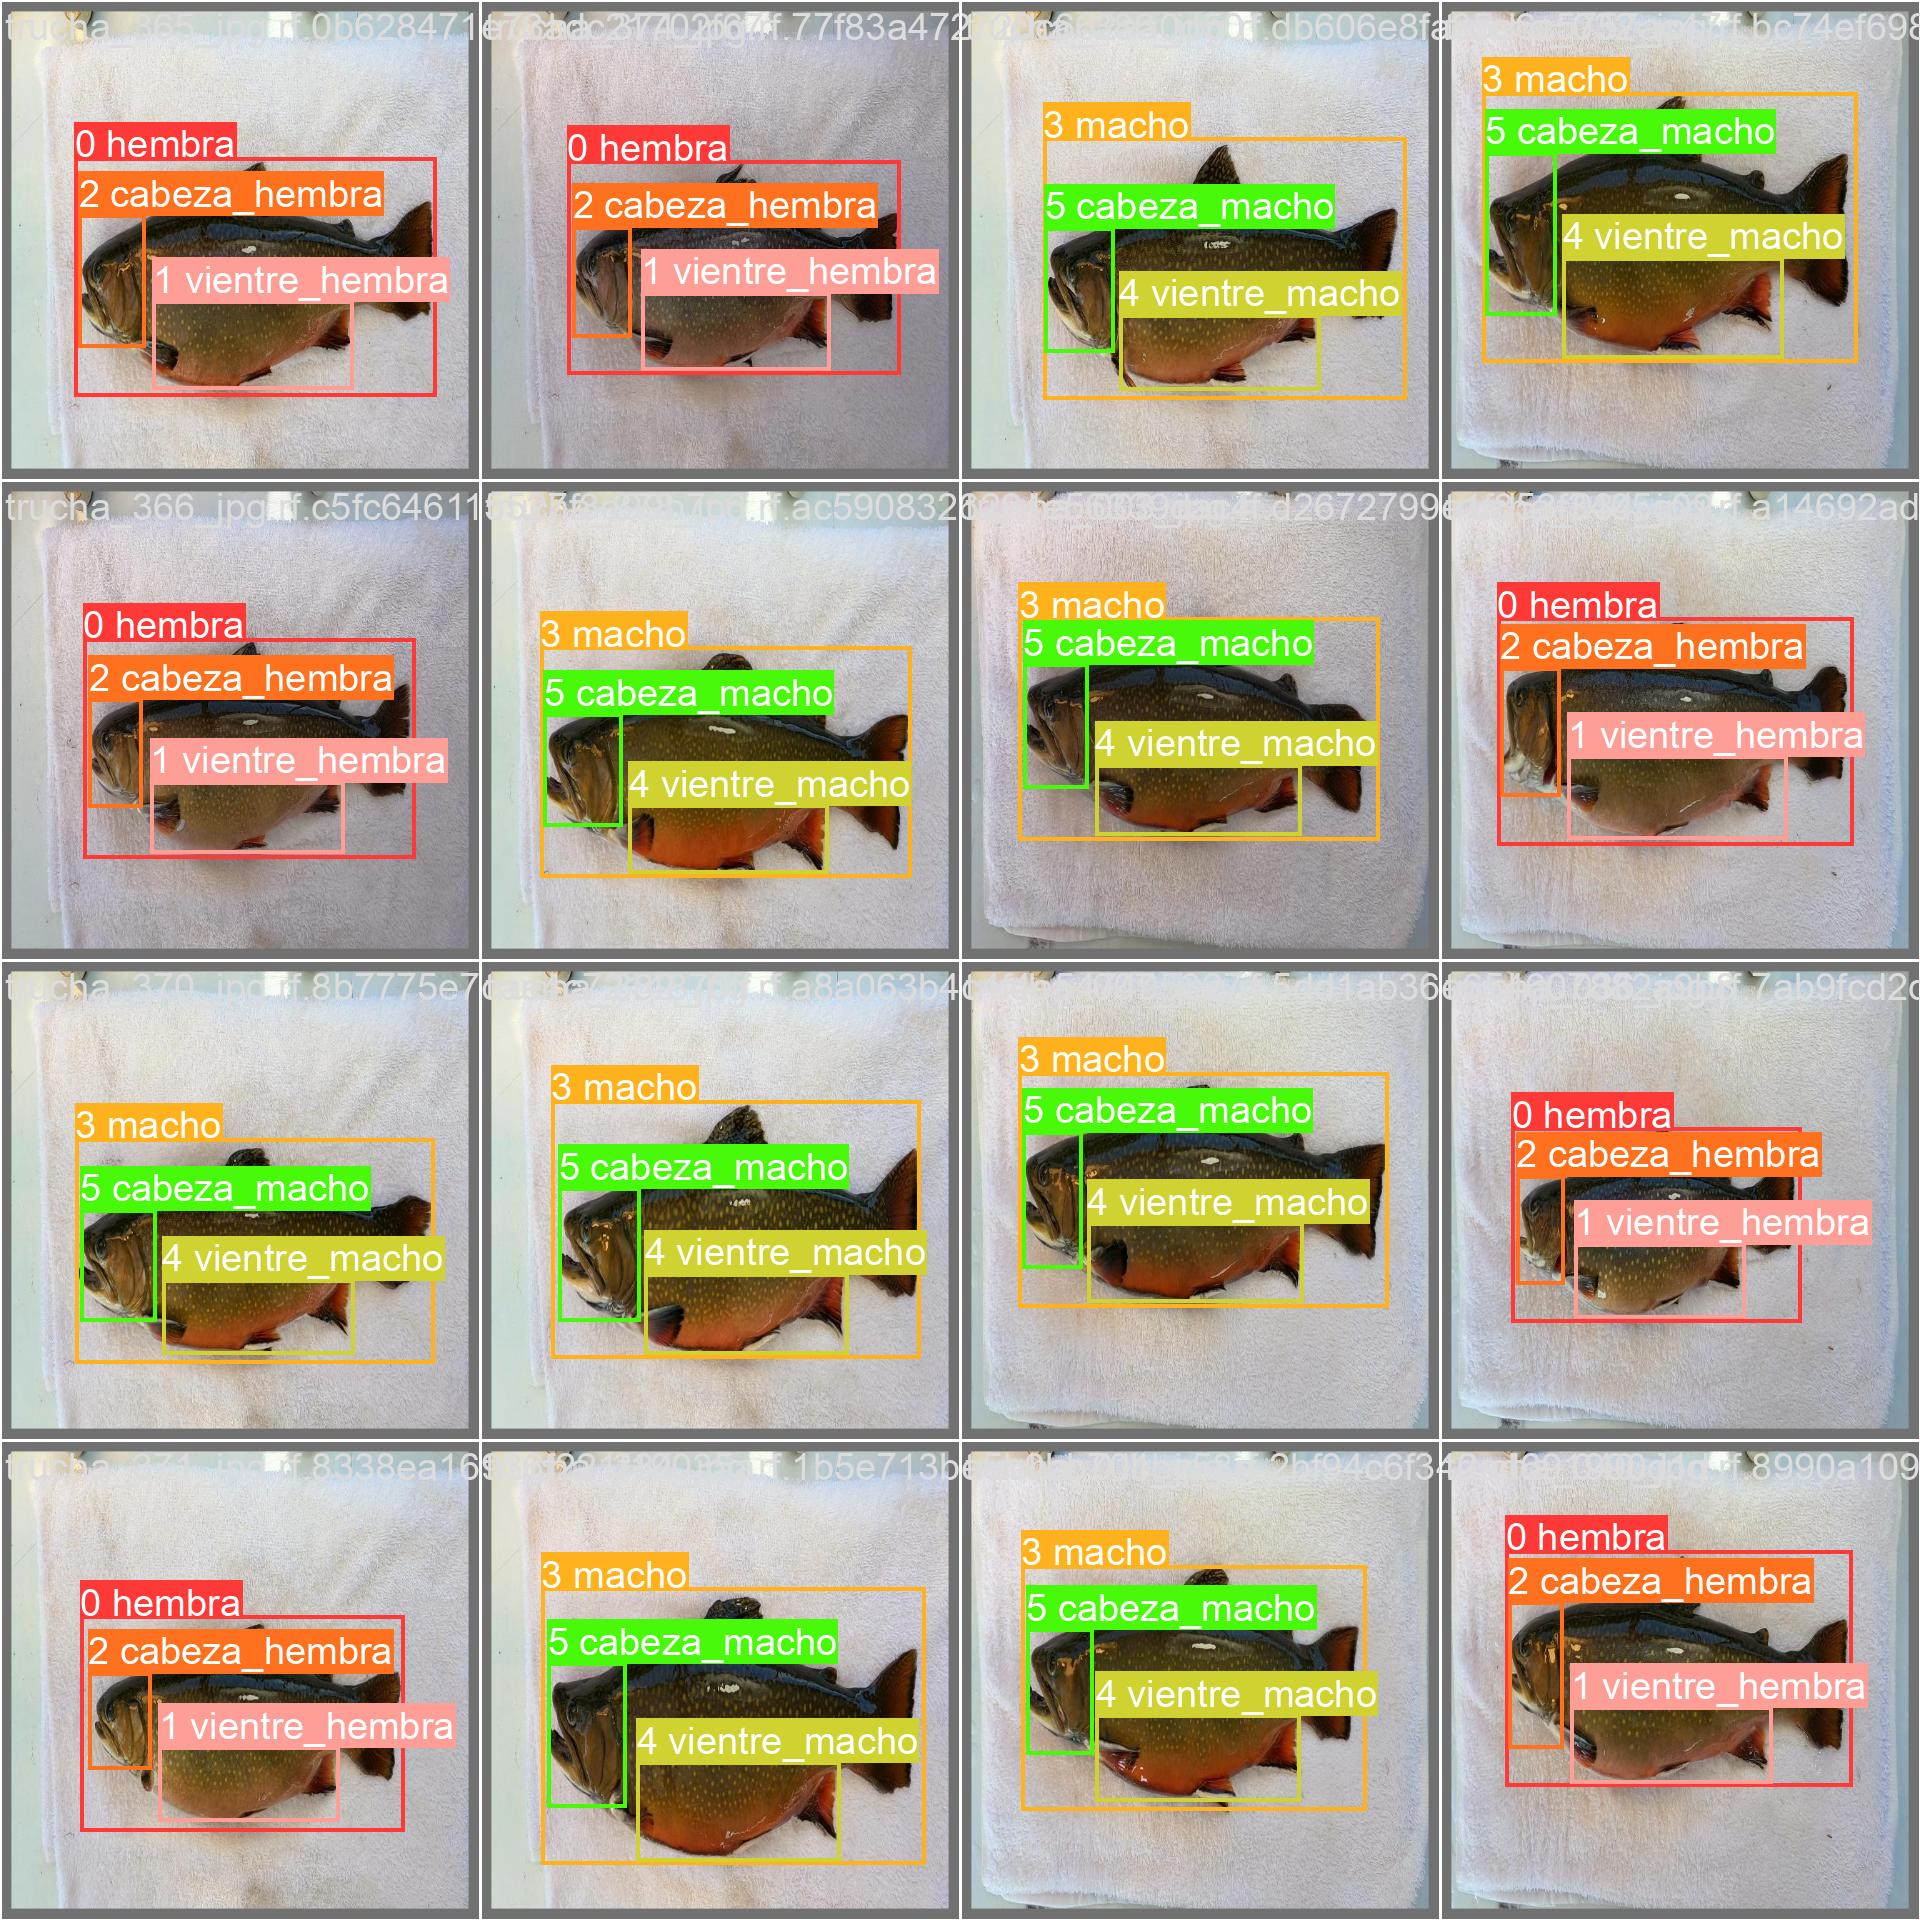

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results4/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


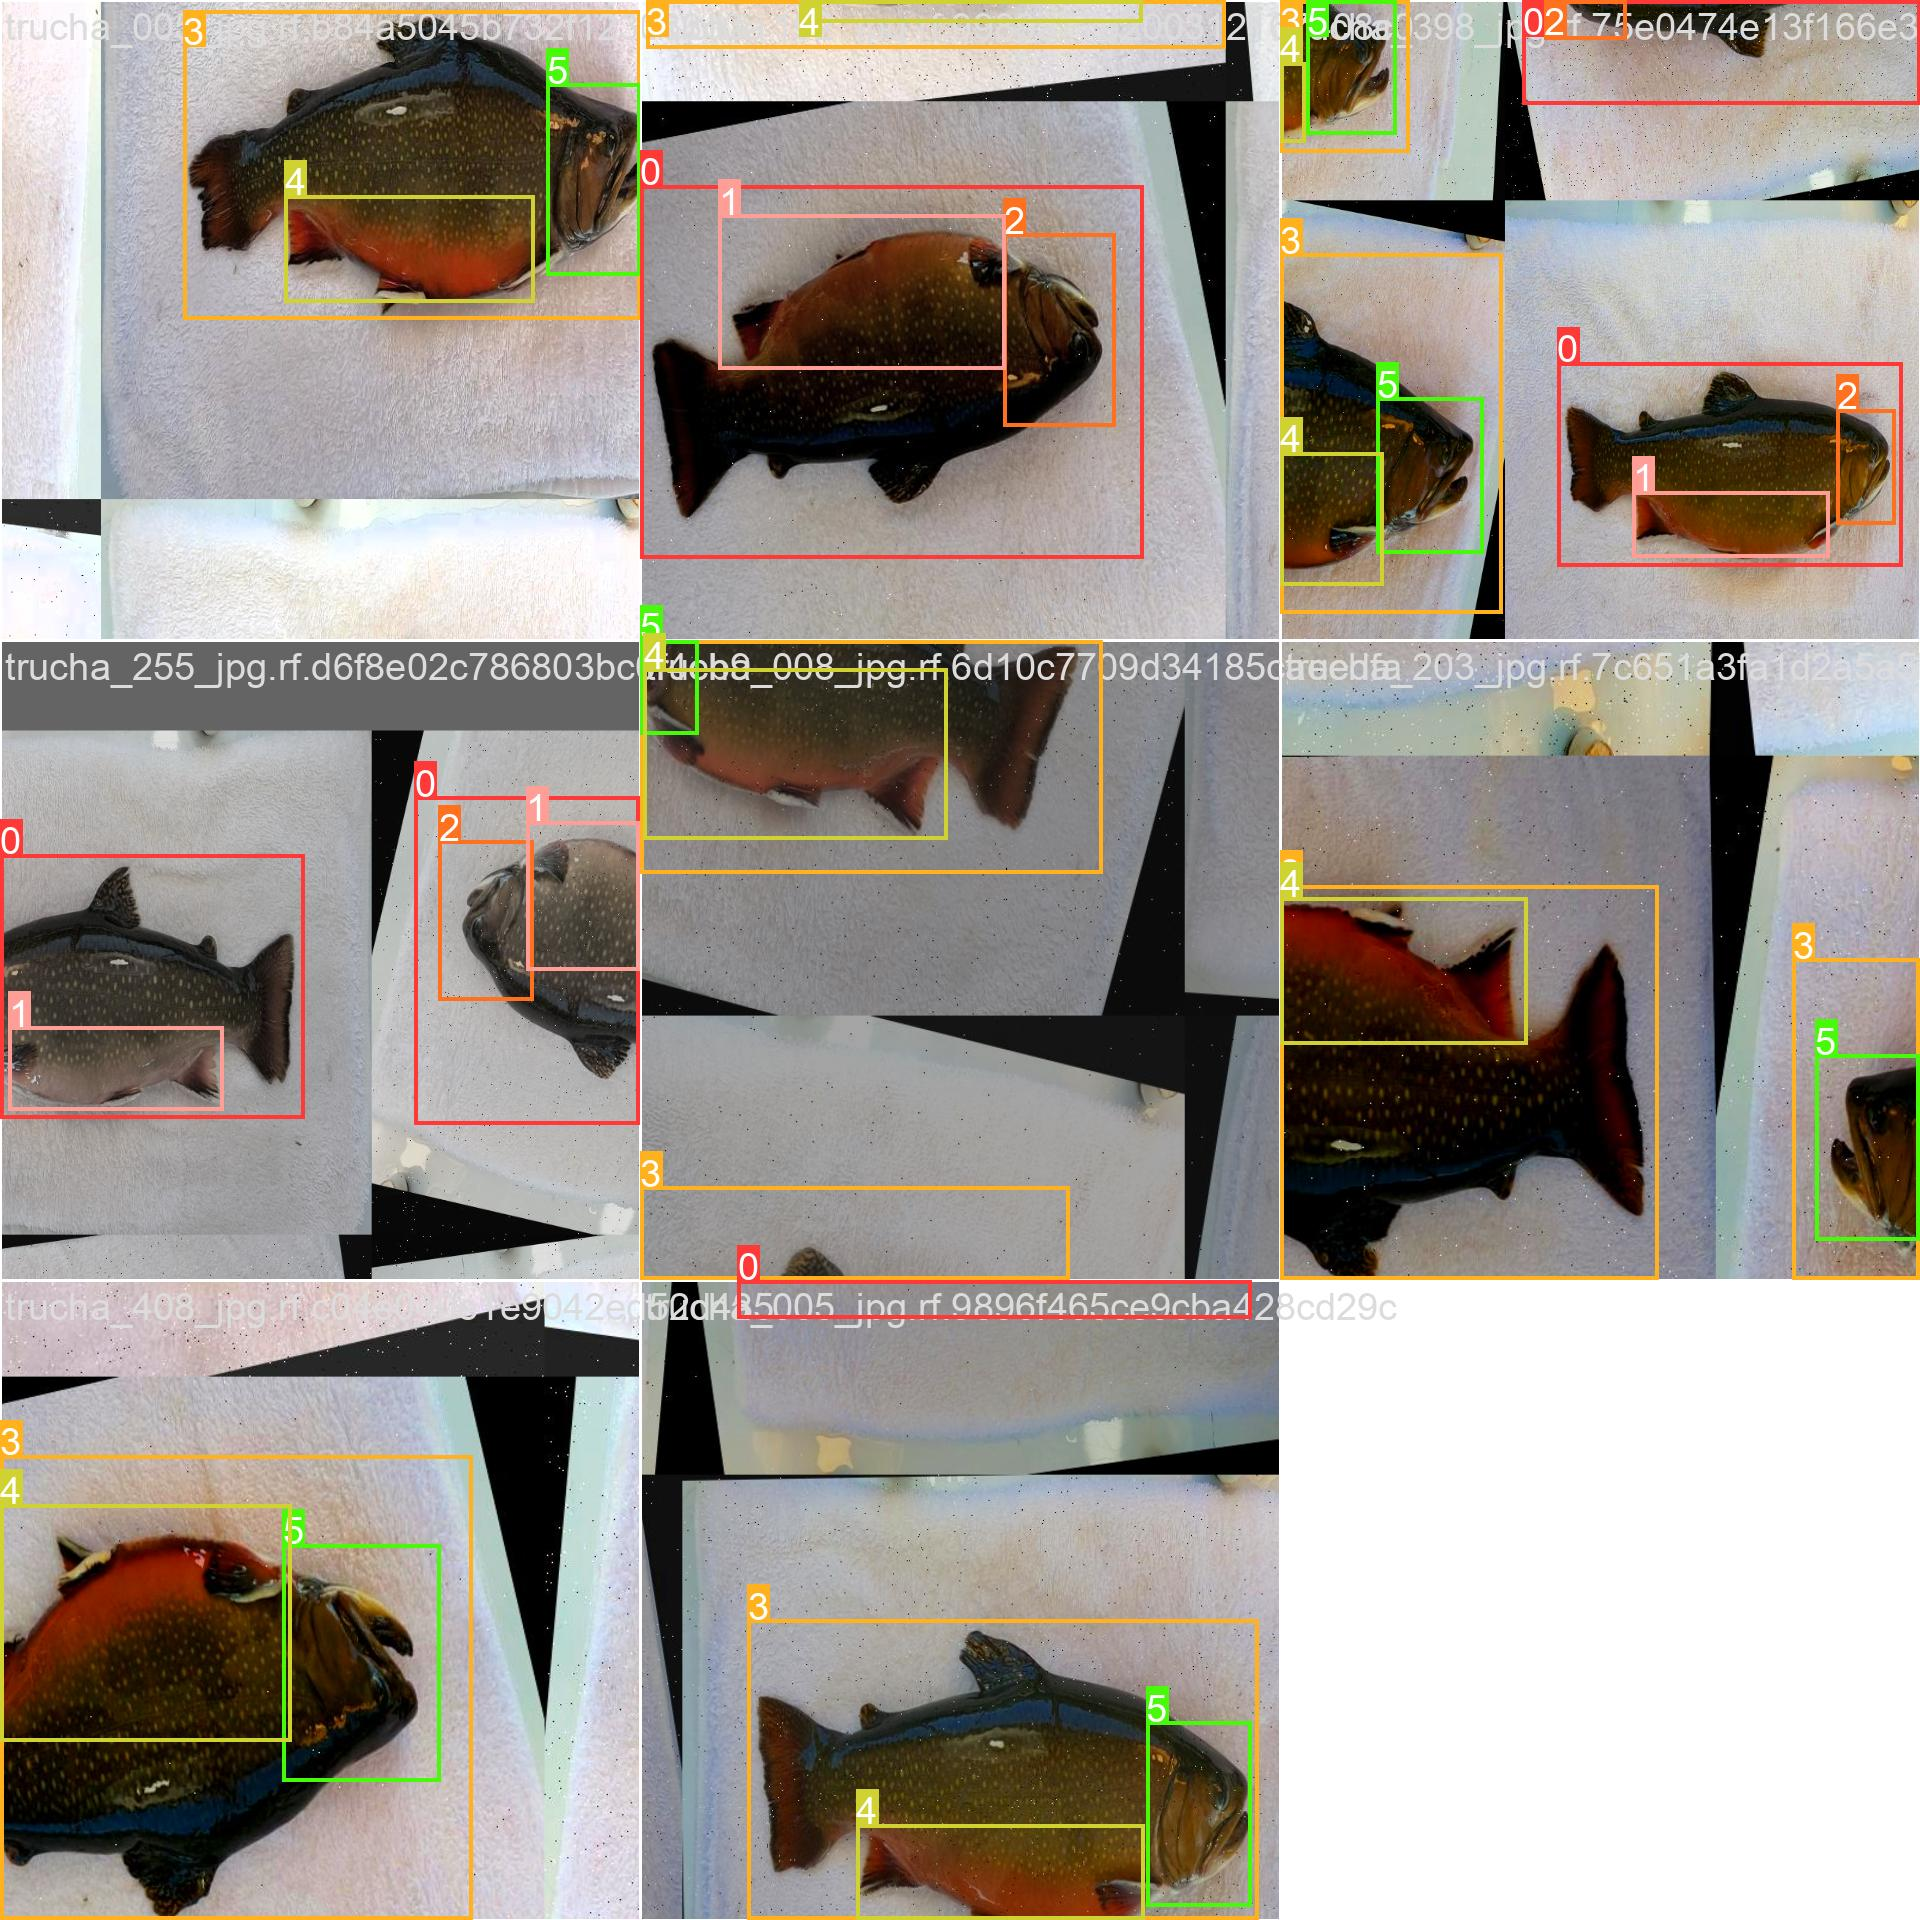

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results4/train_batch0.jpg', width=400)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results4/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results4/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results4/weights/best.pt'], source=/content/fish_detection-1/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/43 /content/fish_detection-1/test/images/trucha_004_jpg.rf.b83b58fe86f90df6c30f6332c072ce80.jpg: 416x416 1 3 macho, 1 4 vientre_macho, 1 5 cabeza_macho, 7.1ms
image 2/43 /content/fish_detection-1/test/images/trucha_0

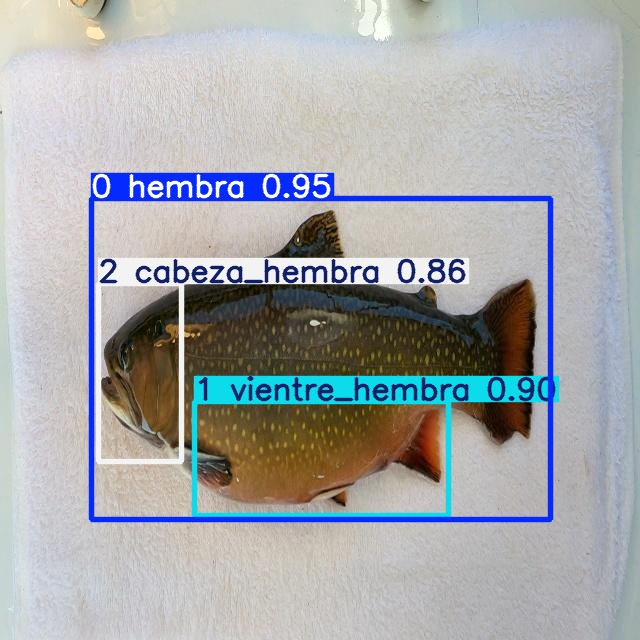

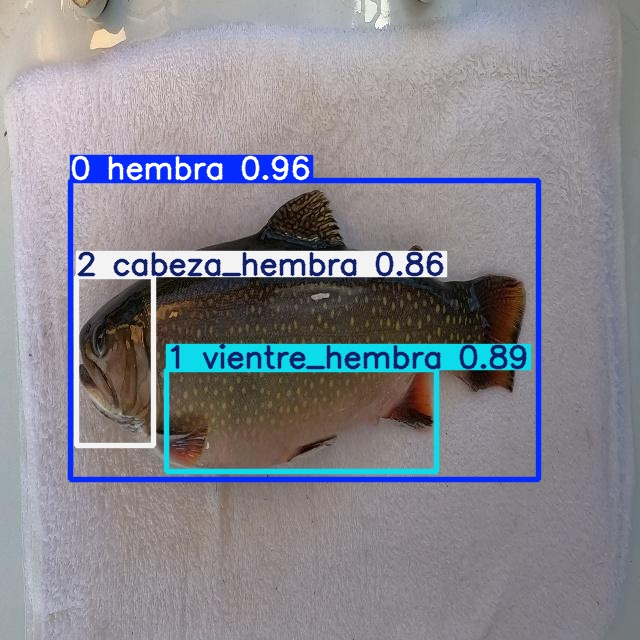

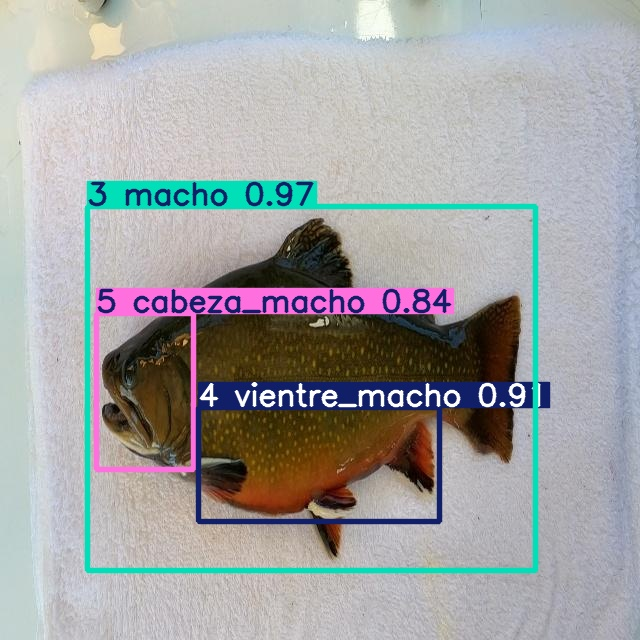

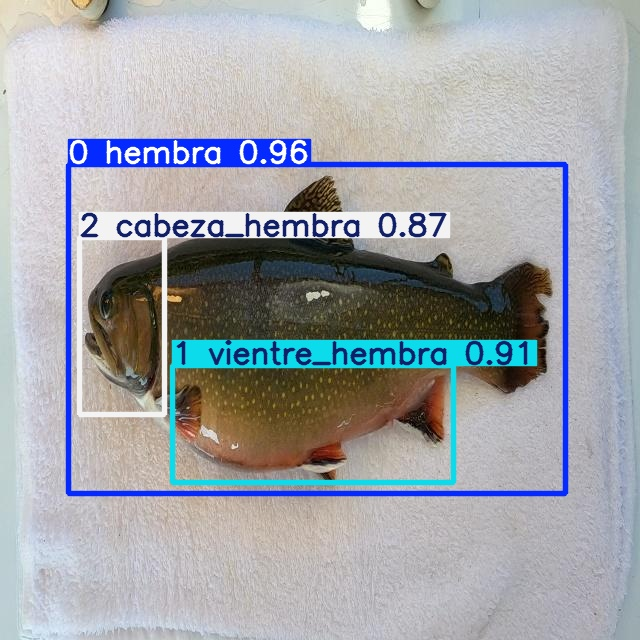

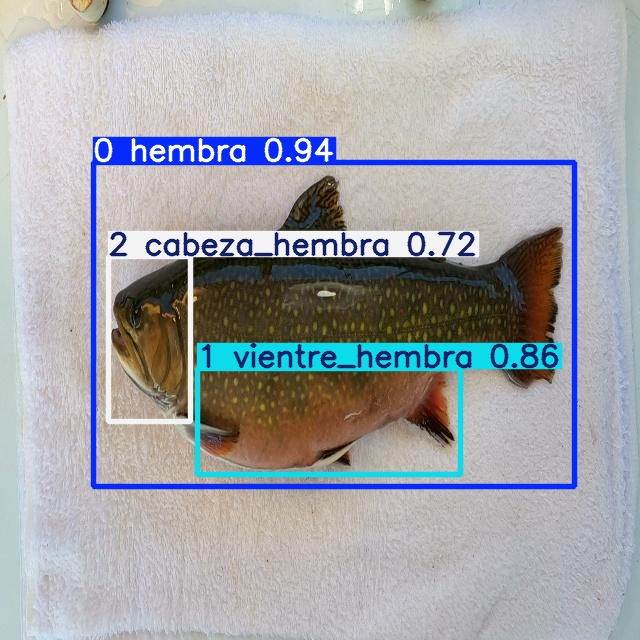

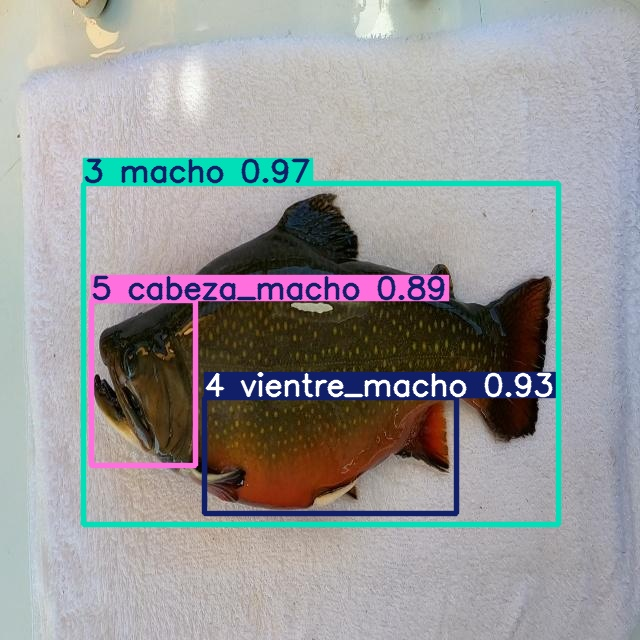

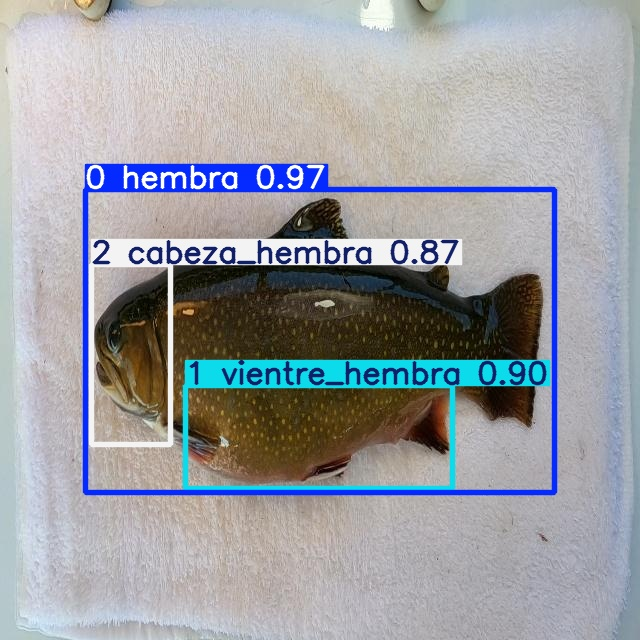

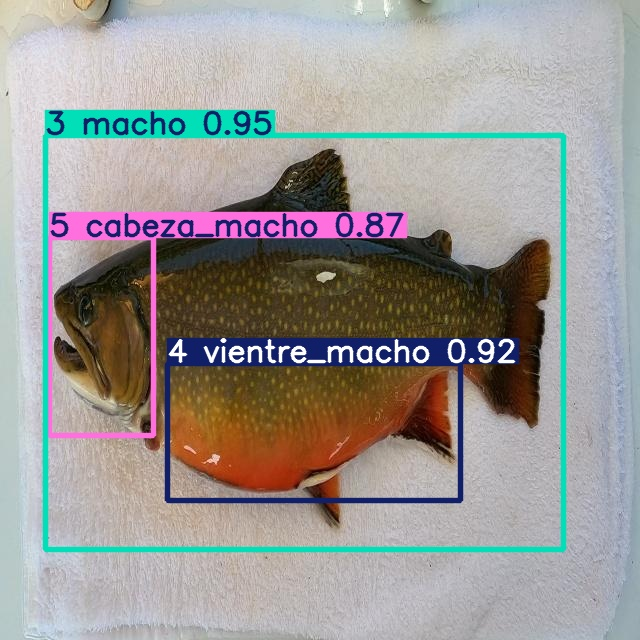

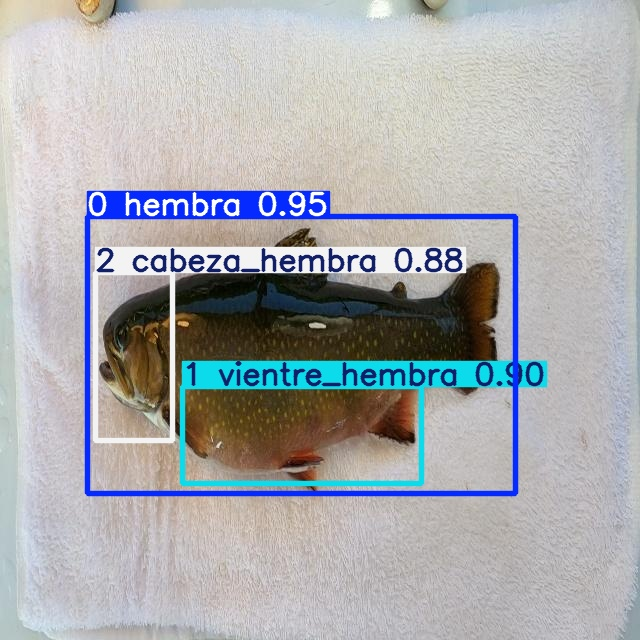

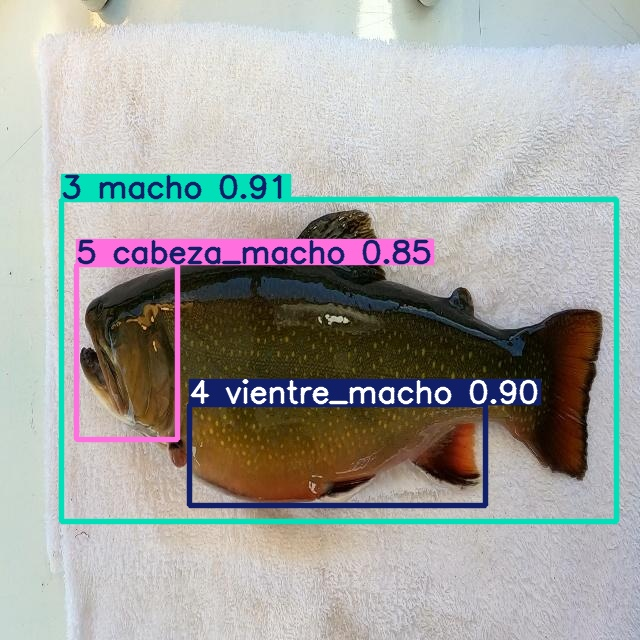

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

In [ ]:
!python val.py --weights /content/yolov5/runs/train/yolov5s_results4/weights/best.pt --data /content/fish_detection-1/data.yaml --task test --img 640 --conf 0.25 --save-txt --save-conf


val: data=/content/fish_detection-1/data.yaml, weights=['/content/yolov5/runs/train/yolov5s_results4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/fish_detection-1/test/labels... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<00:00, 808.96it/s]
test: New cache created: /content/fish_detection-1/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:02<00:00,  1.33s/it]
                   all  

In [ ]:
import shutil

# Comprimir la carpeta
shutil.make_archive('/content/yolov5', 'zip', '/content/yolov5')

# Descargar el archivo comprimido
from google.colab import files
files.download('/content/yolov5.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!wget https://www.thenewflyfisher.com/wp-content/uploads/2017/10/brookie_Fotor-small.jpg -O /content/test_image.jpg


--2024-11-25 03:24:00--  https://www.thenewflyfisher.com/wp-content/uploads/2017/10/brookie_Fotor-small.jpg
Resolving www.thenewflyfisher.com (www.thenewflyfisher.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3121::, ...
Connecting to www.thenewflyfisher.com (www.thenewflyfisher.com)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘/content/test_image.jpg’

/content/test_image     [  <=>               ] 333.94K  1.18MB/s    in 0.3s    

2024-11-25 03:24:01 (1.18 MB/s) - ‘/content/test_image.jpg’ saved [341952]



In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results4/weights/best.pt --img-size 640 --conf-thres 0.25 --source https://cmapspublic.ihmc.us/rid=1176384314000_769650580_8175/male%20female%20brook%20trout.jpg


detect: weights=['/content/yolov5/runs/train/yolov5s_results4/weights/best.pt'], source=https://cmapspublic.ihmc.us/rid=1176384314000_769650580_8175/male%20female%20brook%20trout.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 91.1k/91.1k [00:00<00:00, 252kB/s]
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/male female brook trout.jpg: 448x640 (no detections), 32.0ms
Speed: 0.5ms pre-process, 32.0ms inference, 59.2ms NMS per image at shape (1, 3, 64

ESTE ES LA NUEVA VERSION DE PRUEBA DE YOLOV5s PARA COMPROBAR FUNCIONAMIENTO Y QUE DE LAS METRICAS CON EL DATASET DE VALIDACION

In [ ]:
##CODIGO NUEVO PARA IMPLEMENTAR
%cd /content
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip uninstall wandb -qy
import torch
from IPython.display import Image, clear_output

# Verificación de configuración
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 26.8 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=c4decbde-b199-3133-8062-9710bdc0f746, L2_cache_size=4MB)


Configuración de Roboflow y el dataset


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="3oF8RcZJHCDPlZFvpUDM")
project = rf.workspace("universidad-e9w4f").project("fish_detection-qikds")
version = project.version(1)
dataset = version.download("yolov5")
%cat /content/fish_detection-1/data.yaml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fish_detection-1 in yolov5pytorch:: 100%|██████████| 4542/4542 [00:00<00:00, 5383.12it/s]


names:
- 0 hembra
- 1 vientre_hembra
- 2 cabeza_hembra
- 3 macho
- 4 vientre_macho
- 5 cabeza_macho
nc: 6
roboflow:
  license: CC BY 4.0
  project: fish_detection-qikds
  url: https://universe.roboflow.com/universidad-e9w4f/fish_detection-qikds/dataset/1
  version: 1
  workspace: universidad-e9w4f
test: ../test/images
train: fish_detection-1/train/images
val: fish_detection-1/valid/images


Entrenamiento de YOLOv5s


In [ ]:
%%time
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 50 \
  --data /content/yolov5/fish_detection-1/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results \
  --cache


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02141    0.01852   0.006012         44        640:  76% 204/267 [00:42<00:12,  5.20it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02144     0.0185   0.006035         34        640:  77% 205/267 [00:43<00:12,  4.98it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49       2.3G    0.02144    0.01849   0.006054         42        640:  77% 206/267 [00:43<00:12,  4.78it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cu

Visualización de los resultados del entrenamiento

GROUND TRUTH AUGMENTED TRAINING DATA:


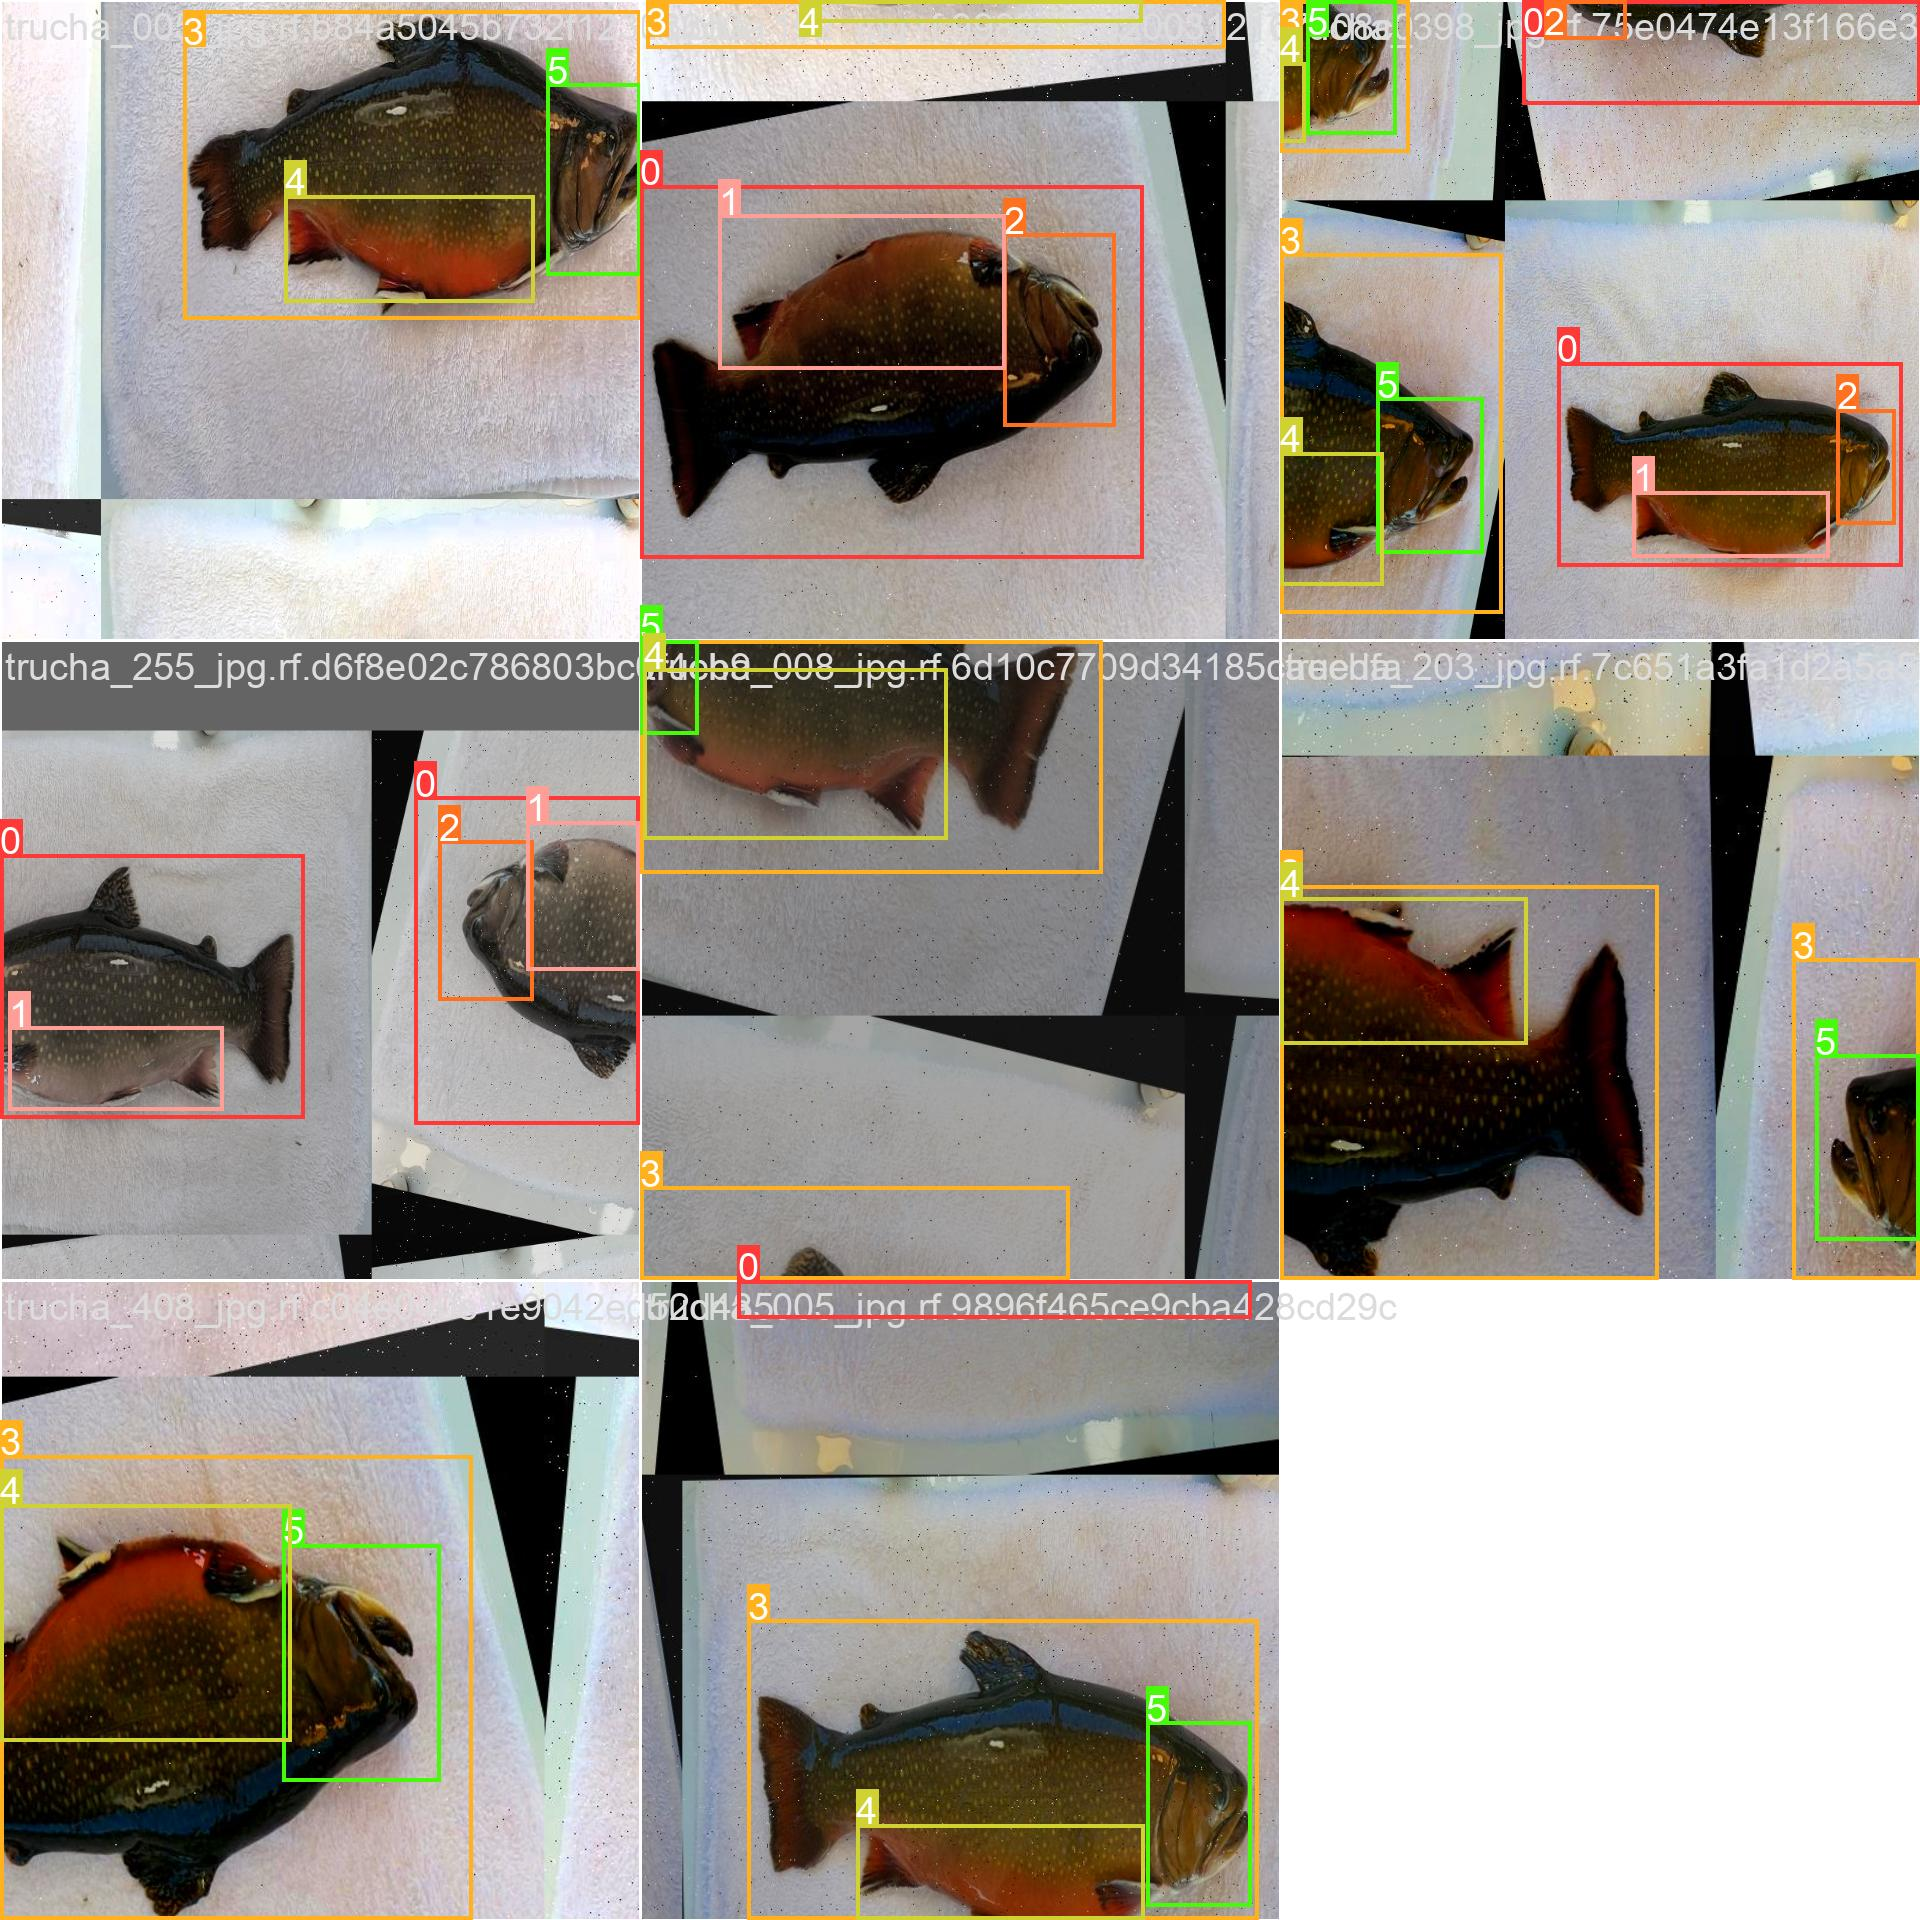

In [ ]:
from utils.plots import plot_results

# Resultados generales
Image(filename='/content/yolov5/runs/train/yolov5s_results2/results.png', width=1000)

# Ejemplo etiquetado
Image(filename='/content/yolov5/runs/train/yolov5s_results2/val_batch0_labels.jpg', width=900)

# Ejemplo de datos aumentados
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg', width=400)


Listado de resultados y detección del modelo

In [ ]:
# Listar resultados del entrenamiento
%ls runs/
%ls runs/train/yolov5s_results/weights

# Usar el modelo entrenado para detectar en las imágenes de prueba
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/


Evaluación del modelo y métricas

In [ ]:
# Evaluar el modelo para obtener métricas de precisión, recall, mAP, etc.
!python val.py --weights runs/train/yolov5s_results/weights/best.pt --data /content/fish_detection-1/data.yaml --img 640 --batch 8


In [ ]:
!zip -r /content/yolov5s_results2.zip /content/yolov5/runs/train/yolov5s_results2


  adding: content/yolov5/runs/train/yolov5s_results2/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results2/train_batch2.jpg (deflated 3%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch2_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results2/labels.jpg (deflated 38%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg (deflated 3%)
  adding: content/yolov5/runs/train/yolov5s_results2/R_curve.png (deflated 10%)
  adding: content/yolov5/runs/train/yolov5s_results2/P_curve.png (deflated 13%)
  adding: content/yolov5/runs/train/yolov5s_results2/PR_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch1_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results2/results.png (deflated 9%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch0_labels.jpg (deflated 7%)
  adding: con

In [ ]:
from google.colab import files
files.download('/content/yolov5s_results2.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DETECTRON2

In [ ]:
# Instalar Detectron2 desde el repositorio oficial
!pip install torch torchvision

# Asegurarte de que tienes PyCOCO tools para trabajar con datasets etiquetados en formato COCO
!pip install pycocotools


In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git


Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 43 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.39 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (11523/11523), done.


In [ ]:
!pip install -e /content/yolov5/detectron2


Obtaining file:///content/yolov5/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [ ]:
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("/content/yolov5/detectron2/configs/COCO-Detection/fast_rcnn_R_50_FPN_1x.yaml")



In [ ]:
# Descargar y descomprimir el dataset desde Roboflow
!cd /content/yolov5/detectron2
!curl -L "https://app.roboflow.com/ds/fcgsu1iErW?key=G1glPBvFxa" > roboflow.zip
!unzip roboflow.zip -d /content/yolov5/detectron2/datasets


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1648      0 --:--:-- --:--:-- --:--:--  1647
100  148M  100  148M    0     0  10.3M      0  0:00:14  0:00:14 --:--:-- 12.5M
Archive:  roboflow.zip
  inflating: /content/yolov5/detectron2/datasets/README.dataset.txt  
  inflating: /content/yolov5/detectron2/datasets/README.roboflow.txt  
   creating: /content/yolov5/detectron2/datasets/test/
  inflating: /content/yolov5/detectron2/datasets/test/_annotations.coco.json  
 extracting: /content/yolov5/detectron2/datasets/test/trucha_004_jpg.rf.b83b58fe86f90df6c30f6332c072ce80.jpg  
 extracting: /content/yolov5/detectron2/datasets/test/trucha_014_jpg.rf.0fdc09078fc782d39dcf232922c50ae2.jpg  
 extracting: /content/yolov5/detectron2/datasets/test/trucha_029_jpg.rf.48c26d46f2f682cf34b956d1f08c8785.jpg  
 extracting: /content/yolov5/detectron2/datasets/test

In [ ]:
import detectron2
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
import os
import numpy as np
import pandas as pd  # Importamos pandas para manejar el CSV

# Crear lista para almacenar todas las métricas de cada época
epoch_metrics = []

# Verificar si los datasets ya están registrados antes de intentar eliminarlos
if "train_dataset" in DatasetCatalog:
    DatasetCatalog.remove("train_dataset")
if "val_dataset" in DatasetCatalog:
    DatasetCatalog.remove("val_dataset")

# Registrar el dataset en formato COCO
register_coco_instances("train_dataset", {}, "/content/yolov5/detectron2/datasets/train/_annotations.coco.json", "/content/yolov5/detectron2/datasets/train")
register_coco_instances("val_dataset", {}, "/content/yolov5/detectron2/datasets/valid/_annotations.coco.json", "/content/yolov5/detectron2/datasets/valid")

# Configuración de los metadatos
train_metadata = MetadataCatalog.get("train_dataset")
val_metadata = MetadataCatalog.get("val_dataset")

# Configuración del modelo
cfg = get_cfg()
cfg.merge_from_file("/content/yolov5/detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Cargar archivo de configuración

# Ruta del dataset y pesos preentrenados
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)  # Para evaluación
cfg.DATALOADER.NUM_WORKERS = 4

# Hiperparámetros
cfg.SOLVER.IMS_PER_BATCH = 8  # Batch size a 8
cfg.SOLVER.BASE_LR = 0.0025    # Learning rate inicial
cfg.SOLVER.MAX_ITER = 50 * (len(DatasetCatalog.get("train_dataset")) // 8)  # 50 epochs, ajustado al tamaño del dataset
cfg.SOLVER.STEPS = []          # Sin reducción de LR durante el entrenamiento

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 8  # Batch size por imagen
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Número de clases en tu dataset

# Cargar pesos preentrenados desde la URL
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"

# Tamaño de la imagen
cfg.INPUT.MIN_SIZE_TRAIN = 640
cfg.INPUT.MIN_SIZE_TEST = 640

# Guardar el modelo entrenado
cfg.OUTPUT_DIR = "/content/yolov5/detectron2/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Entrenamiento con evaluación
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

    # Sobrescribir la función de entrenamiento para almacenar todas las métricas por cada época
    def run_step(self):
        super().run_step()

        # Obtener las métricas después de cada epoch
        metrics = self.storage.history  # Aquí debería estar el diccionario de métricas

        # Asegúrate de que `metrics` es un diccionario y no una función
        if isinstance(metrics, dict):
            epoch_metric = {
                'epoch': self.storage.iter,
                'train/box_loss': metrics.get("train/box_loss", {}).get('avg', np.nan),
                'train/obj_loss': metrics.get("train/obj_loss", {}).get('avg', np.nan),
                'train/cls_loss': metrics.get("train/cls_loss", {}).get('avg', np.nan),
                'metrics/precision': metrics.get("metrics/precision", {}).get('avg', np.nan),
                'metrics/recall': metrics.get("metrics/recall", {}).get('avg', np.nan),
                'metrics/mAP_0.5': metrics.get("metrics/mAP_0.5", {}).get('avg', np.nan),
                'metrics/mAP_0.5:0.95': metrics.get("metrics/mAP_0.5:0.95", {}).get('avg', np.nan),
                'val/box_loss': metrics.get("val/box_loss", {}).get('avg', np.nan),
                'val/obj_loss': metrics.get("val/obj_loss", {}).get('avg', np.nan),
                'val/cls_loss': metrics.get("val/cls_loss", {}).get('avg', np.nan),
                'x/lr0': metrics.get("x/lr0", {}).get('avg', np.nan),
                'x/lr1': metrics.get("x/lr1", {}).get('avg', np.nan),
                'x/lr2': metrics.get("x/lr2", {}).get('avg', np.nan),
            }
            epoch_metrics.append(epoch_metric)

# Entrenar el modelo
trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Evaluar el modelo después del entrenamiento
evaluator = COCOEvaluator("val_dataset", cfg, False, output_dir=os.path.join(cfg.OUTPUT_DIR, "inference"))
trainer.test(cfg, trainer.model, evaluators=[evaluator])

# Guardar todas las métricas por cada época en un archivo CSV
metrics_df = pd.DataFrame(epoch_metrics)
metrics_df.to_csv('/content/yolov5/detectron2/output/all_metrics_per_epoch.csv', index=False)
print("Todas las métricas por época guardadas en 'all_metrics_per_epoch.csv'.")


WARNING [11/30 02:26:53 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/30 02:26:53 d2.data.datasets.coco]: Loaded 2135 images in COCO format from /content/yolov5/detectron2/datasets/train/_annotations.coco.json
[11/30 02:26:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[11/30 02:26:54 d2.engine.train_loop]: Starting training from iteration 0
[11/30 02:27:13 d2.utils.events]:  eta: 3:25:14  iter: 19  total_loss: 3.159  loss_cls: 2.166  loss_box_reg: 0.9761  loss_rpn_cls: 0.06961  loss_rpn_loc: 0.02064    time: 0.9174  last_time: 0.8480  data_time: 0.1158  last_data_time: 0.0671   lr: 4.9952e-05  max_mem: 6137M
[11/30 02:27:31 d2.utils.events]:  eta: 3:25:34  iter: 39  total_loss: 2.112  loss_cls: 1.139  loss_box_reg: 0.9646  loss_rpn_cls: 0.02878  loss_rpn_loc: 0.01986    time: 0.9145  last_time: 0.8837  data_time: 0.0919  last_data_time: 0.0802   lr: 9.9902e-05  max_mem: 6138M
[11/30 02:27:50 d2.utils.events]:  eta: 3:25:25  iter: 59  total_loss: 1.77  loss_cls: 0.7712  loss_box_reg: 0.9687  loss_rpn_cls: 0.0143  loss_rpn_loc: 0.01702    time: 0.9253  last_time: 0.9873  data_time: 0.1031  last_data_time: 0.1413   lr: 0.00014985  max_mem: 6138M
[11/30 02:28:09 d2.utils.events]:  eta: 3:25:00  iter: 79  total_loss: 1.575  loss_cls: 0.6728  loss_box_reg